# Resultados históricos de partidos Fifa (1993 - 2002)


---

El futbol es simplemente pasión de multitudes, con resultados muchas veces impredecibles pero, ¿existirá una manera de predecir de manera certera los resultados? Nos enfocamos en esta pregunta al momento de elegir este dataset, que cuenta con los resultados de todos los partidos registrados por la FIFA desde 1993 hasta el 2022. La hipótesis principal es que existe relación entre el rendimiento pasado de las selecciones con sus resultados futuros. De esta manera, cotejamos datos no solo de resultados de los partidos, sino que también de equipos participantes, lugares de juego definiendo la localidad de cada equipo, el ranking FIFA que poseía al momento de efectuar el partido, así como estadísticas de defensa, ofensa, medio campo e incluso el nombre del torneo por el que cada partido fue disputado.
Esto nos permitirá obtener valiosos insights sobre muchas interrogantes, las cuales son, sólo por nombrar algunas:
* ¿Los equipos que tienen mayor puntaje FIFA tienen mejores resultados que sus contrapartes?
* ¿Qué tan fuerte es la relación entre los resultados y los puntos asignados a cada equipo?
* ¿Existe diferencia real de goles entre los diferentes continentes?
* ¿Se puede asumir que hay diferencia de dificultad notable por continente?
La inmensa cantidad de datos contenidos en esta base de datos nos ha permitido responder todas estas dudas, y también plantearnos unas nuevas para poder resolverlas a futuro. Hasta el momento hemos notado que sí existe un componente relacional respecto a las variables analizadas, por lo que hemos podido recabar algunas conclusiones respecto a las preguntas hechas, que se responderán a continuación.

##Contexto y problema comercial

A partir del 2020, y gracias a la pandemia, los sitios de apuesta se han vuelto cada vez más populares, por lo que tener información fresca y acertada sobre predicciones deportivas se ha convertido en un muy buen negocio. Es en ese contexto que nace la oportunidad comercial de manejar datos sobre desempeño histórico que nos permitan de una manera parcial o completa, adelantar y ponderar monertariamente los eventos futuros.

## **Stakeholders - Público Objetivo**

De acuerdo a nuestro objetivo principal <<predecir con el menor margen de error posible los resultados de los encuentros futbolisticos de acuerdo a datos historicos, puntos asignados, resultados, goles, resultados de visitante o local, etc>> el análisis esta dirigido a periodismo especializado, casas de apuestas, fanáticos y aficionados.

In [126]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [127]:
from google.colab import drive

drive.mount ('/content/gdrive')
df = pd.read_csv('/content/gdrive/MyDrive/CODERHOUSE/international_matches.csv',sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

#¿Los equipos que tienen mayor puntaje FIFA tienen mejores resultados que sus contrapartes?

Normalmente los equipos que cuentan con un puntaje mayor tienen un resultado positivo (Win) en el resultado del encuentro.

<AxesSubplot:xlabel='away_team_total_fifa_points', ylabel='away_team'>

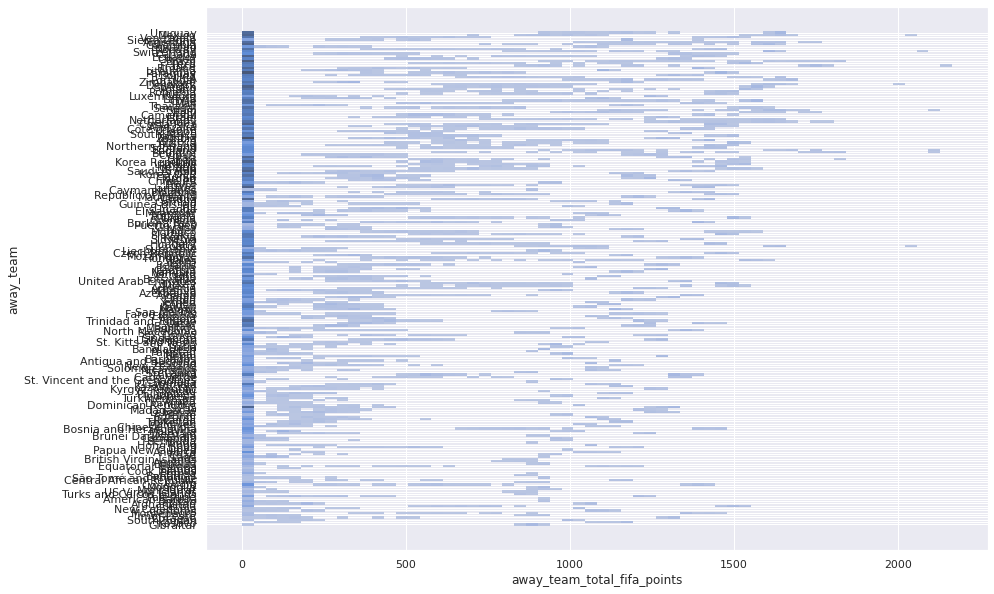

In [129]:
sns.histplot(data=df, y="away_team", x="away_team_total_fifa_points") 

In [130]:
df.isna().sum() #reconocimiento de datos para ver la fiabilidad en los resultados de las distintas etiquetas.

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

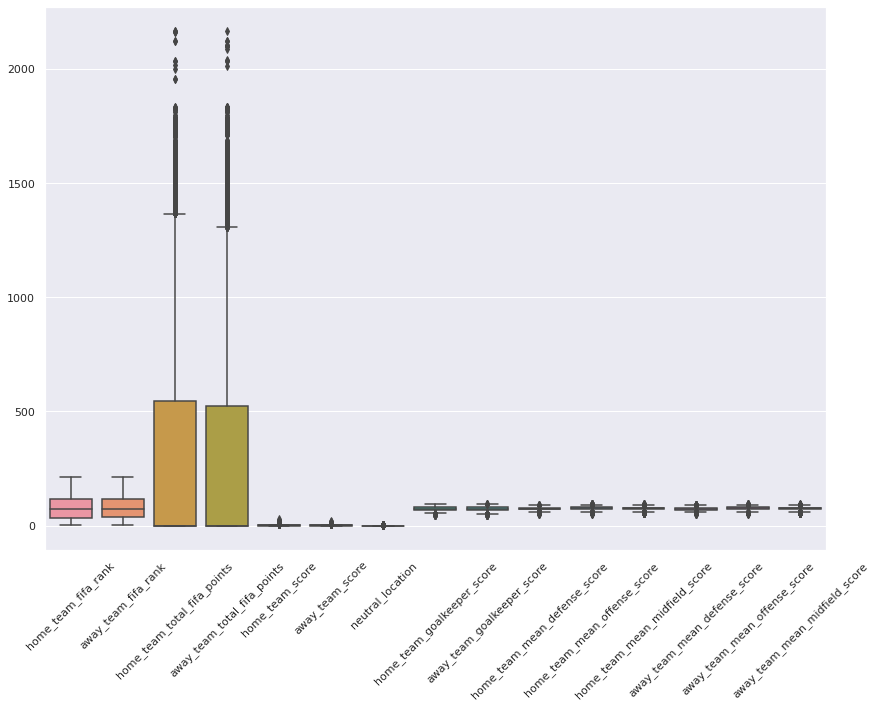

In [131]:
ax=sns.boxplot(data=df) # La finalidad es encontrar posibles outliers que afecten los resutlados de las hipotesis. Podemos observar varios Outliers en lo que consideramos variables criticas(Puntos Fifa local y visitante)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

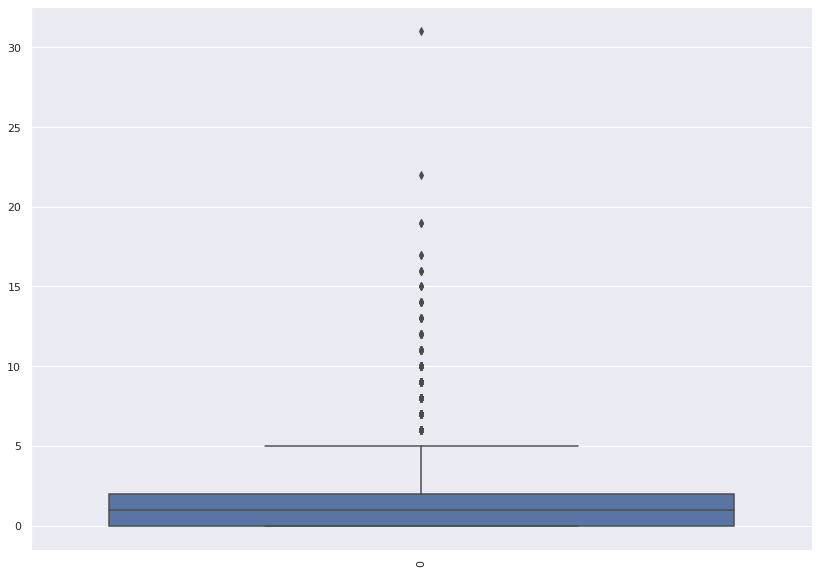

In [132]:
ax=sns.boxplot(data=df.home_team_score ) # La finalidad es encontrar posibles outliers que afecten los resutlados de las hipotesis. Podemos observar varios Outliers en lo que consideramos variables criticas(Puntos Fifa local y visitante)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Podemos ver varios outliers para la variable Home team Score por lo cual requiere tratamiento de los mismos para tener mayor confianza en los resutlados de las hipotesis.

# ¿Qué tan fuerte es la relación entre los resultados y los puntos asignados a cada equipo?

Se puede observar que a mayor puntaje asignado al equipo mas alta es la porbabilidad de que el resultado sea favaroble.

In [133]:
Resultados = df.home_team_result
PuntosEquipo =df.home_team_score                      


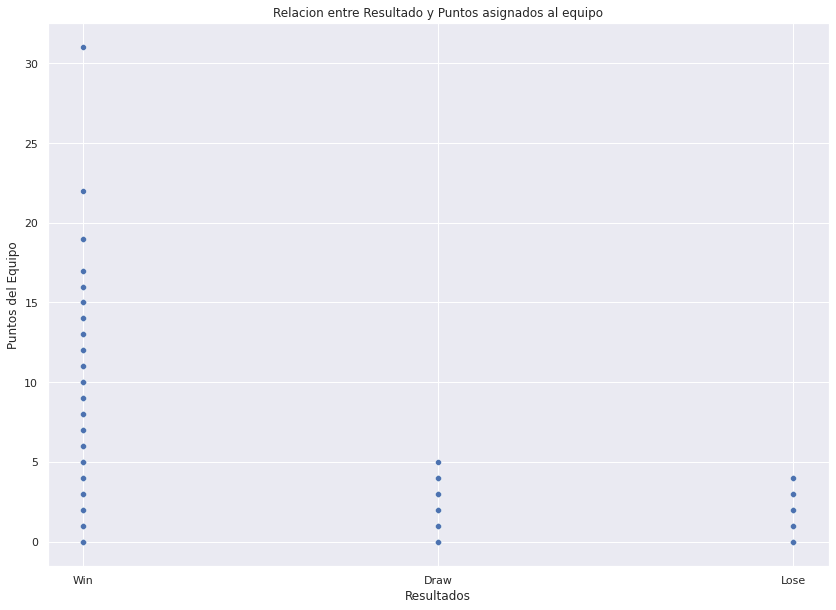

In [134]:
plt.figure()

sns.scatterplot(x=Resultados, y=PuntosEquipo)
plt.title('Relacion entre Resultado y Puntos asignados al equipo')
plt.xlabel('Resultados')
plt.ylabel('Puntos del Equipo')
plt.show()

# ¿Existe diferencia entre la dificultad por continentes?
En este gráfico se refleja la diferencia de goles en el resultado por cada continente, es así como, Europa y Sudamérica tienen las barras más bajas, ya que son los continentes más competitivos, dejando a Asia como el menos competitivo.

<ipython-input-135-a5cd195b7498>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.home_continent = df.iloc[:,3]


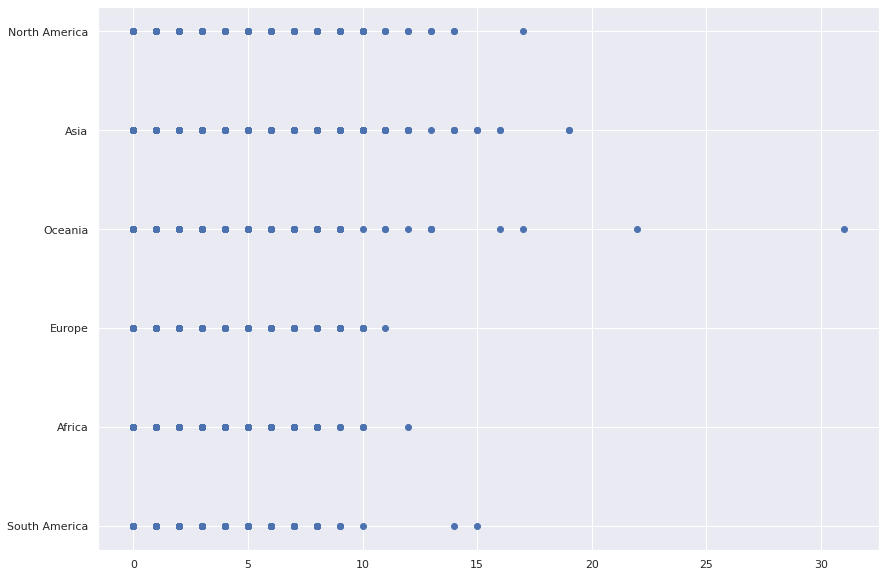

In [135]:
df.home_continent = df.iloc[:,3]
date = df.iloc[:,9]

y= df.home_continent
x= date

plt.scatter(x,y)
plt.show()

**Stakeholders - Público Objetivo**


> De acuerdo a nuestro objetivo principal <<predecir con el menor margen de error posible los resultados de los encuentros futbolisticos de acuerdo a datos historicos, puntos asignados, resultados, goles, resultados de visitante o local, etc>> el análisis esta dirigido a periodismo especializado, casas de apuestas, fanáticos y aficionados.





In [136]:
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [137]:
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
fifa_rank = home.append(away)


fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')

fifa_rank_top

,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


In [138]:
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
offense  = home.append(away)

offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


In [139]:
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)

defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


In [140]:
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)

midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


In [141]:
df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3
df['diff_total_score'] = df['home_total_score'] - df['away_total_score']

In [142]:
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score [['date', 'home_team','home_total_score']].rename(columns = {'home_team': 'team', 'home_total_score' : 'total_score'})
away = total_score [['date', 'away_team','away_total_score']].rename(columns = {'away_team': 'team', 'away_total_score' : 'total_score'})
total_score  = home.append(away)

total_score   = total_score .sort_values(['team', 'date'], ascending=[True, False])
total_score ['row_number'] = defense .groupby('team').cumcount()+1
total_score_top_10 = total_score [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'total_score')
total_score_top_10

,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


In [143]:
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
df['score_difference'] = df['home_team_score'] - df['away_team_score']
df['is_won'] = df['score_difference'] > 0 
df['is_stake'] = df['tournament'] != 'Friendly'

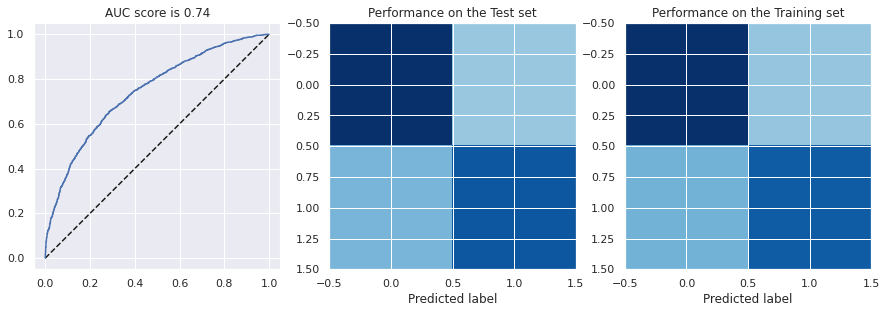

In [144]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference','is_stake']], df['is_won']
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [145]:
#Equipos Qatar 2022
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'South Korea']

In [146]:
world_cup_rankings_home = df[['home_team','home_team_fifa_rank','home_team_total_fifa_points']].loc[df['home_team'].isin(teams_worldcup) & (df['date']>'2021-01-01')] #Get last 2 years of information (try to get all time too, get interesting results!)
world_cup_rankings_away = df[['away_team','away_team_fifa_rank','away_team_total_fifa_points']].loc[df['away_team'].isin(teams_worldcup)& (df['date']>'2021-01-01')]
world_cup_rankings_home = world_cup_rankings_home.set_index(['home_team'])

In [147]:
#Separando los desempeños como visita y como local...
world_cup_rankings_home = world_cup_rankings_home.groupby('home_team').mean()
world_cup_rankings_away = world_cup_rankings_away.groupby('away_team').mean()

In [148]:
world_cup_rankings_away.head(13)

,away_team_fifa_rank,away_team_total_fifa_points
away_team,,
Argentina,5.875000,1717.500000
Australia,36.428571,1477.571429
Belgium,1.181818,1810.818182
Brazil,1.888889,1810.444444
Cameroon,49.428571,1431.857143
Canada,55.866667,1400.000000
Costa Rica,45.857143,1440.928571
Croatia,15.600000,1607.800000
Denmark,10.500000,1640.000000


In [149]:
world_cup_rankings_away.index

Index(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada',
       'Costa Rica', 'Croatia', 'Denmark', 'Ecuador', 'England', 'France',
       'Germany', 'Ghana', 'Japan', 'Mexico', 'Morocco', 'Netherlands',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'Spain', 'Switzerland', 'Tunisia', 'USA', 'Uruguay', 'Wales'],
      dtype='object', name='away_team')

In [150]:
from tqdm import tqdm 

simulation_winners = list()
simulation_results_winners = list()
simulation_results_round16 = list()
simulation_df_round16 = list()
simulation_results_quarterfinal = list()
simulation_df_quarterfinal = list()
simulation_results_semifinal = list()
simulation_df_semifinal = list()

n_simulations = 1000 #Number of Simulations

for j in tqdm(range(n_simulations)):
    #IMPORTANT: It has to sort the teams in the order of pairs they might go against starting from round_16 (i.e SENEGAL X NETHERLANDS, or FRANCE x DENMARK) - to play around with the matches check https://www.telegraph.co.uk/world-cup/2022-predictor-wallchart-football-qatar/
    candidates = [ 'Senegal', 'Netherlands', 'England','USA', 'Argentina', 'Poland', 'France', 'Denmark','Spain', 'Germany', 'Belgium', 'Croatia', 'Brazil', 'Serbia', 'Portugal','Uruguay']
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
    
    for f in finals:
        iterations = int(len(candidates) / 2)
        #print('STEP:', iterations) #uncomment to observe in more details the iteraction
        winners = []
        prob = []


        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings_home.loc[home, 'home_team_fifa_rank']
            home_points = world_cup_rankings_home.loc[home, 'home_team_total_fifa_points']
            opp_rank = world_cup_rankings_away.loc[away, 'away_team_fifa_rank']
            opp_points = world_cup_rankings_away.loc[away, 'away_team_total_fifa_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            home_win_prob = model.predict_proba(row)[:,1][0]
            
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            winners.append(away) if simulated_outcome <= 0.5 else winners.append(home)
            prob.append(1 - simulated_outcome) if simulated_outcome <= 0.5 else prob.append(simulated_outcome)
        
        if f == 'round_of_16':
            step_16 = ['round_16'] * 8
            candidates_round_16 = zip(step_16, winners, prob)
            df_candidates_round_16 = pd.DataFrame(candidates_round_16, columns = ['Step','Team','Prob'])
            simulation_df_round16.append(df_candidates_round_16)
            simulation_results_round16.append(winners)

        if f == 'quarterfinal':
            step_quarterfinal = ['quarterfinal'] * 4
            candidates_quarterfinal = zip(step_quarterfinal,winners, prob)
            df_candidates_quarterfinal = pd.DataFrame(candidates_quarterfinal, columns = ['Step','Team','Prob'])
            simulation_df_quarterfinal.append(df_candidates_quarterfinal)
            simulation_results_quarterfinal.append(winners)

        if f == 'semifinal':    
            step_semifinal = ['semifinal'] * 2
            candidates_semifinal = zip(step_semifinal,winners, prob)
            df_candidates_semifinal = pd.DataFrame(candidates_semifinal, columns = ['Step','Team','Prob'])
            simulation_df_semifinal.append(df_candidates_semifinal)
            simulation_results_semifinal.append(winners)

        if f == 'final':    
            step_final = ['final'] * 1
            candidates_final = zip(step_final,winners, prob)
            df_candidates_final = pd.DataFrame(candidates_final, columns = ['Step','Team','Prob'])
            simulation_winners.append(df_candidates_final)
            simulation_results_winners.append(winners)

        
        #uncomment to observe every result of each step and iteration
        #list_win = list(zip(winners,prob))
        #print(list_win)
        candidates = winners 

df_candidates_round_16 = pd.concat(simulation_df_round16)
df_candidates_quarterfinal = pd.concat(simulation_df_quarterfinal)
df_candidates_semifinal = pd.concat(simulation_df_semifinal)
df_candidates_final = pd.concat(simulation_winners)

df_results = pd.concat([df_candidates_round_16,df_candidates_quarterfinal,df_candidates_semifinal,df_candidates_final]) #final DataFrame

simulation_results_round16 = sum(simulation_results_round16, [])
simulation_results_quarterfinal = sum(simulation_results_quarterfinal, [])
simulation_results_semifinal = sum(simulation_results_semifinal, [])
simulations_winners = sum(simulation_results_winners, [])

100%|██████████| 1000/1000 [00:33<00:00, 30.17it/s]


In [151]:
from collections import Counter

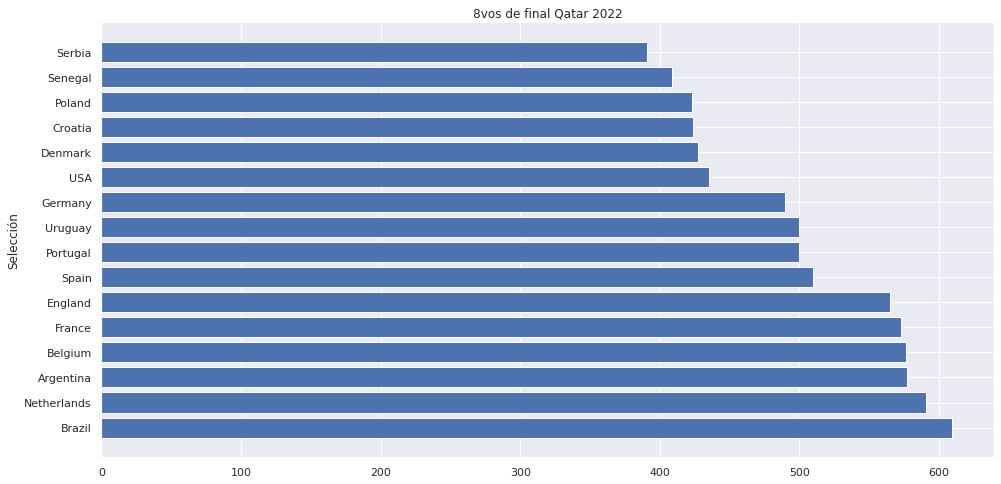

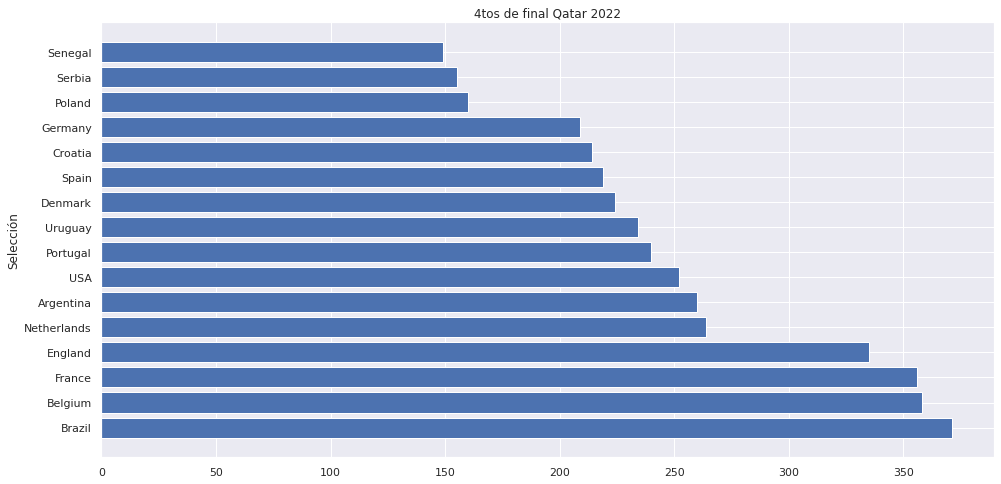

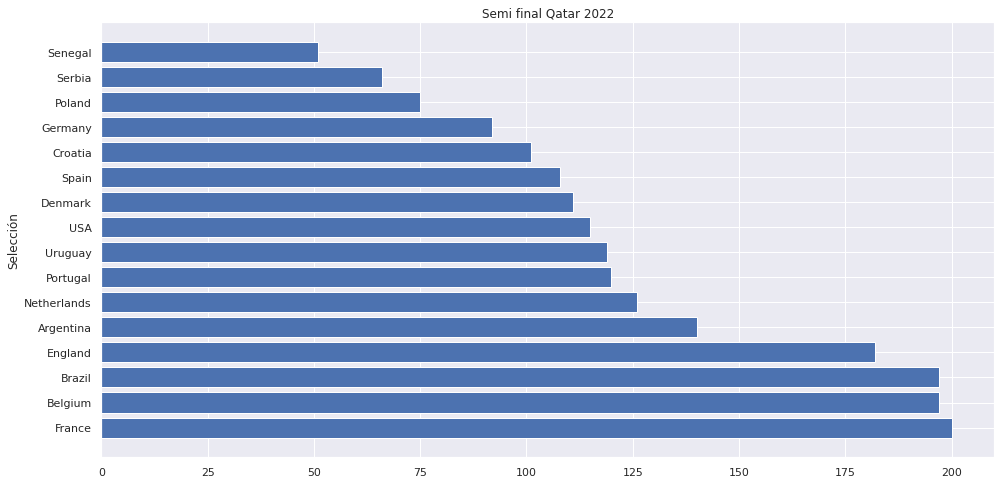

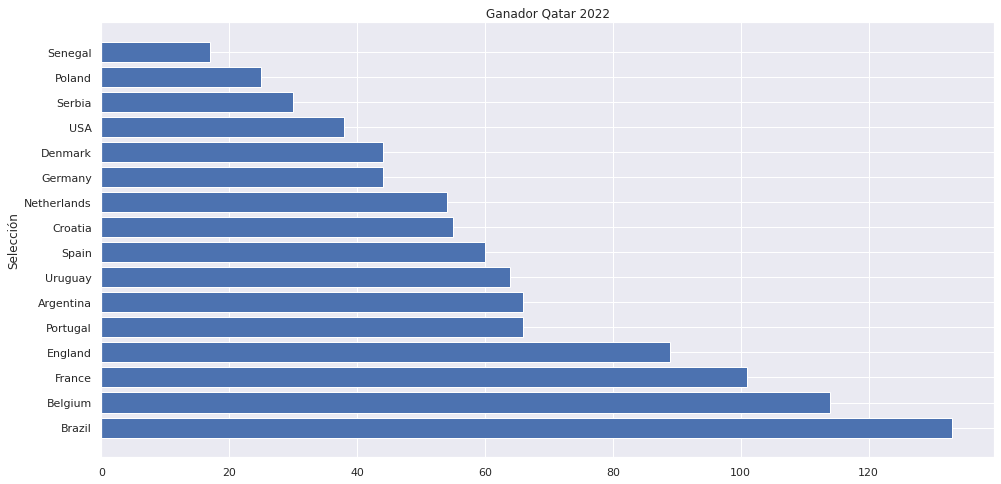

In [152]:
from matplotlib import figure

lst_results = [simulation_results_round16,simulation_results_quarterfinal,simulation_results_semifinal,simulations_winners]
for i in lst_results:
    results = Counter(i).most_common()
    x,y = zip(*results)

    fig,ax = plt.subplots(figsize=(16,8))

    ax.barh(x, y)

    ax.set_ylabel('Selección')

    if i == simulation_results_round16:
        ax.set_title('8vos de final Qatar 2022')
    if i == simulation_results_quarterfinal:
        ax.set_title('4tos de final Qatar 2022')
    if i == simulation_results_semifinal:
        ax.set_title('Semi final Qatar 2022')
    if i == simulations_winners:
        ax.set_title('Ganador Qatar 2022')

        
    plt.show()

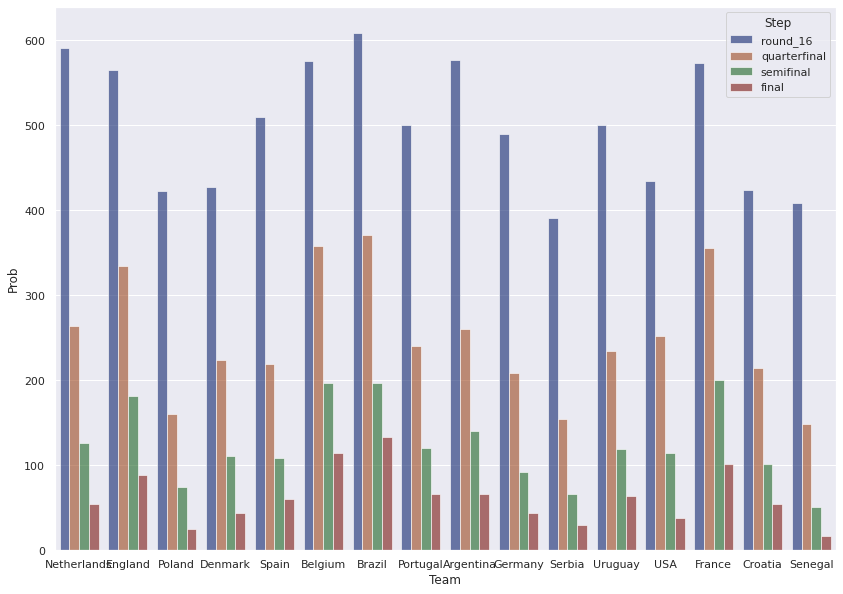

In [153]:
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,10)})

# Draw a nested barplot by Team and Step
g = sns.barplot(data=df_results, x="Team",y='Prob', hue="Step", estimator=sum, palette="dark", alpha=.6)

In [154]:
df.count(axis=0, level=None, numeric_only=False)

date                             23921
home_team                        23921
away_team                        23921
home_team_continent              23921
away_team_continent              23921
home_team_fifa_rank              23921
away_team_fifa_rank              23921
home_team_total_fifa_points      23921
away_team_total_fifa_points      23921
home_team_score                  23921
away_team_score                  23921
tournament                       23921
city                             23921
country                          23921
neutral_location                 23921
shoot_out                        23921
home_team_result                 23921
home_team_goalkeeper_score        8379
away_team_goalkeeper_score        8095
home_team_mean_defense_score      7787
home_team_mean_offense_score      8510
home_team_mean_midfield_score     8162
away_team_mean_defense_score      7564
away_team_mean_offense_score      8312
away_team_mean_midfield_score     7979
home_total_score         

In [155]:
df.tournament

0        FIFA World Cup qualification
1                            Friendly
2        FIFA World Cup qualification
3                            Friendly
4        FIFA World Cup qualification
                     ...             
23916             UEFA Nations League
23917             UEFA Nations League
23918                       Kirin Cup
23919                       Kirin Cup
23920                        Friendly
Name: tournament, Length: 23921, dtype: object

---
#⚽⚽⚽⚽⚽⚽⚽⚽⚽⚽ Data Storytelling ⚽⚽⚽⚽⚽⚽⚽⚽⚽⚽

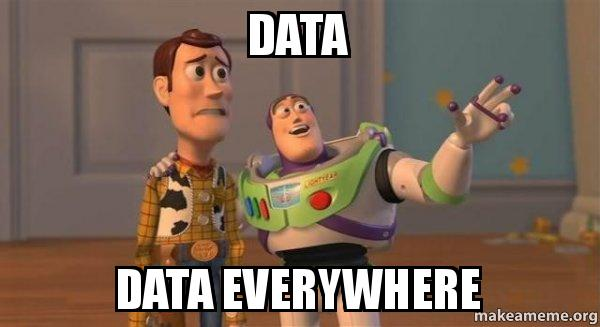

---



## A través de éste Notebook esperamos ayudarte en ⚽
 

*   ¿Es verdad que los latinos y europeos tenemos un desempeño muy superior al resto del mundo en fútbol? 🌍 📈
*   Entendiendo que el usuario final o Stakeholders es muy amplio (entendiendo por tales, periodistas especializados, casas de apuestas y público en general). Se aplican técnicas que permiten abordar los problemas de manera sencilla y con resultados simples de leer. 🤓
*   Puedes solicitar mayor profunidad en el análisis sobre temas especifico contactandonos directamente a la siguiente casilla xxx@aaa.com 📬







In [156]:
import pandas as pd
import numpy as np
import seaborn as sns


In [157]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [158]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [159]:
coord = pd.read_csv('/content/gdrive/MyDrive/CODERHOUSE/country-coordinates.csv',sep=',')
coord


,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
239,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
240,Western Sahara,EH,ESH,732,24.5000,-13.0
241,Yemen,YE,YEM,887,15.0000,48.0
242,Zambia,ZM,ZMB,894,-15.0000,30.0


In [160]:
coord.columns

Index(['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code',
       'Latitude (average)', 'Longitude (average)'],
      dtype='object')

In [161]:
coord.columns = ['Country', 'Alpha-2 code', 'Alpha-3 code', 'Numeric code',
'Latitude', 'Longitude']

coord

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude,Longitude
0,Afghanistan,AF,AFG,4,33.0000,65.0
1,Albania,AL,ALB,8,41.0000,20.0
2,Algeria,DZ,DZA,12,28.0000,3.0
3,American Samoa,AS,ASM,16,-14.3333,-170.0
4,Andorra,AD,AND,20,42.5000,1.6
...,...,...,...,...,...,...
239,Wallis and Futuna,WF,WLF,876,-13.3000,-176.2
240,Western Sahara,EH,ESH,732,24.5000,-13.0
241,Yemen,YE,YEM,887,15.0000,48.0
242,Zambia,ZM,ZMB,894,-15.0000,30.0


In [162]:
gdf1 = geopandas.GeoDataFrame(
    coord, geometry=geopandas.points_from_xy(coord.Latitude, coord.Longitude))
print(gdf1.head())

          Country Alpha-2 code Alpha-3 code  Numeric code  Latitude  \
0     Afghanistan           AF          AFG             4   33.0000   
1         Albania           AL          ALB             8   41.0000   
2         Algeria           DZ          DZA            12   28.0000   
3  American Samoa           AS          ASM            16  -14.3333   
4         Andorra           AD          AND            20   42.5000   

   Longitude                  geometry  
0       65.0     POINT (33.000 65.000)  
1       20.0     POINT (41.000 20.000)  
2        3.0      POINT (28.000 3.000)  
3     -170.0  POINT (-14.333 -170.000)  
4        1.6      POINT (42.500 1.600)  


In [163]:
countries = df[['home_team']]

countries

,home_team
0,Bolivia
1,Brazil
2,Ecuador
3,Guinea
4,Paraguay
...,...
23916,Moldova
23917,Liechtenstein
23918,Chile
23919,Japan


In [164]:
x = np.unique(countries)
x

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China PR', 'Chinese Taipei', 'Colombia', 'Comoros',
       'Congo', 'Congo DR', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia'

In [165]:
pais = pd.DataFrame(x,
                    columns=['Country'])

pais

,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
206,Vietnam
207,Wales
208,Yemen
209,Zambia


In [166]:

pd.merge_ordered(coord, pais)

,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude,Longitude,geometry
0,Afghanistan,AF,AFG,4.0,33.0000,65.0,POINT (33.000 65.000)
1,Albania,AL,ALB,8.0,41.0000,20.0,POINT (41.000 20.000)
2,Algeria,DZ,DZA,12.0,28.0000,3.0,POINT (28.000 3.000)
3,American Samoa,AS,ASM,16.0,-14.3333,-170.0,POINT (-14.333 -170.000)
4,Andorra,AD,AND,20.0,42.5000,1.6,POINT (42.500 1.600)
...,...,...,...,...,...,...,...
275,Wallis and Futuna,WF,WLF,876.0,-13.3000,-176.2,POINT (-13.300 -176.200)
276,Western Sahara,EH,ESH,732.0,24.5000,-13.0,POINT (24.500 -13.000)
277,Yemen,YE,YEM,887.0,15.0000,48.0,POINT (15.000 48.000)
278,Zambia,ZM,ZMB,894.0,-15.0000,30.0,POINT (-15.000 30.000)


In [167]:
values = pais
[True if item in df.values else False for item in values]

[False]



---



### Insight N*2
"¿Existen paises que nunca han participado en el futbol?"

In [168]:
df2 = pd.DataFrame(
    {'Country': ['Afghanistan', 'Albania', 'American Samoa', 'Yemen', 'Zimbabwe'],
     'Latitude': [33, 41, 16, 15, -20],
     'Longitude': [65, 20, -170, 48, 30]})

In [169]:
gdf3 = geopandas.GeoDataFrame(
    df2, geometry=geopandas.points_from_xy(df2.Longitude, df2.Latitude))

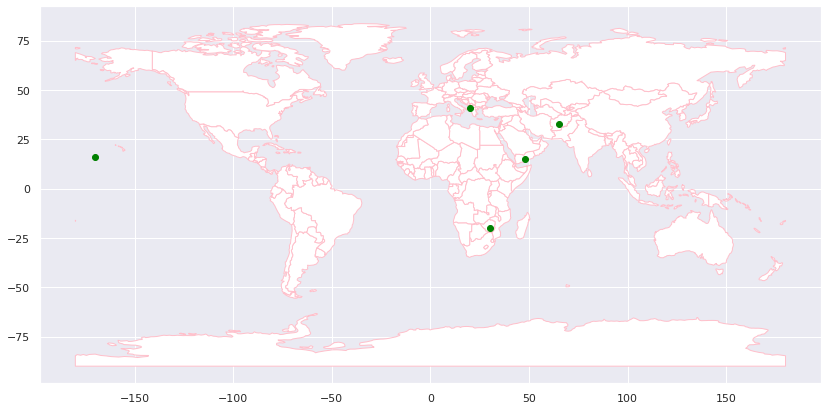

In [170]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', edgecolor='pink')

gdf3.plot(ax=ax, color='green')

plt.show()

# Respuesta: Increíblemente, sí hay países que nunca han participado o muy marginalmente participado en futbol profesional.